# Talent Squad - Data Science I

Juan Sirai

<img src="https://media0.giphy.com/media/wPyDWwurn8XEWdR9ol/giphy.gif" width = 800>

---------------------------------------------------------------------------------
"Approximately 300 sensors are attached to the rocket and mobile launcher to detect, record and transmit information." SpaceX is launching a new rocket chain with a new business purpose, rocket-commerce. In order to achieve this, Elon Musk wants to predict the state of the rockets in order to dynamically adjust costs. For this, it has provided us with the data of several sensors and their status. The objective? Create a model that is able to predict the state.

The objective of this challenge will be to help Elon by performing predictive modeling from a dataset that contains the measurements made by his sensors and types.

## Dataset Features:

**Features:** The dataset contains 6 features in 6 columns, which are the parameters measured from the different sensors. These correspond to the vibrations detected in the rocket.

**Target:** The target corresponds to the 'label' that classifies the types of states of the rocket based on the features measured by the sensors.
* Target 0 corresponds to Stable
* Target 1 corresponds to Light Turbulence
* Target 2 corresponds to Moderate Turbulence
* Target 3 corresponds to Severe Turbulence
* Target 4 corresponds to Extreme Turbulence

## Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

## Exploratory Data Analysis

In [32]:
current_dir = os.getcwd() 
path_train = os.path.join(current_dir, "data","space_X_train.csv")
path_test = os.path.join(current_dir, "data", "space_X_test.csv")
path_predictions = os.path.join(current_dir,"predictions.csv")

In [3]:
train = pd.read_csv(path_train)

In [4]:

def analize_data(df):
    """
    Shows basic statistics information for numerical columns
    """
    print("First rows of dataset")
    display(df.head(3))
    print(f"{'Feature':>10} | {'Count':>10} | {'Max':>10} | {'Min':>10} | {'Std':>10}")
    print()
    for col in df.columns:
        total_values = df[col].count()
        max_value = df[col].max().round(2)
        min_value = df[col].min().round(2)
        std = df[col].std().round(2)
        print(f"{col:>10} | {total_values:>10} | {max_value:>10} | {min_value:>10} | {std:>10}")
    print()
    print(f"Dataframe size: {df.shape[0]} rows and {df.shape[1]} columns")
    print()
    print("Null values")
    print(df.isnull().sum())

In [5]:
analize_data(train)

First rows of dataset


,Unnamed: 0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
0,0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1


   Feature |      Count |        Max |        Min |        Std

Unnamed: 0 |       2100 |       2099 |          0 |     606.36
  sensor_1 |       2100 |       4.57 |      -6.68 |       1.54
  sensor_2 |       2100 |        6.7 |      -5.38 |       1.61
  sensor_3 |       2100 |       4.16 |      -6.15 |       1.45
  sensor_4 |       2100 |       4.37 |      -5.65 |       1.44
  sensor_5 |       2100 |       5.07 |      -5.91 |        1.5
  sensor_6 |       2100 |       4.02 |      -4.43 |       1.19
    target |       2100 |          4 |          0 |       1.41

Dataframe size: 2100 rows and 8 columns

Null values
Unnamed: 0    0
sensor_1      0
sensor_2      0
sensor_3      0
sensor_4      0
sensor_5      0
sensor_6      0
target        0
dtype: int64


--------------------------------------------------------------------
`🚀 Data Hints:`

As we can see in the previous report, our dataset seems to be quite healthy in terms of data, withouth null values and features in similar scales.

We have 6 predictive features, and our target with 5 different status -> 0, 1, 2, 3, 4.

We are goin to use unnamed 0 as our index

--------------------------------------------------------------------

In [6]:
train = train.set_index("Unnamed: 0")

### Predictive features analysis

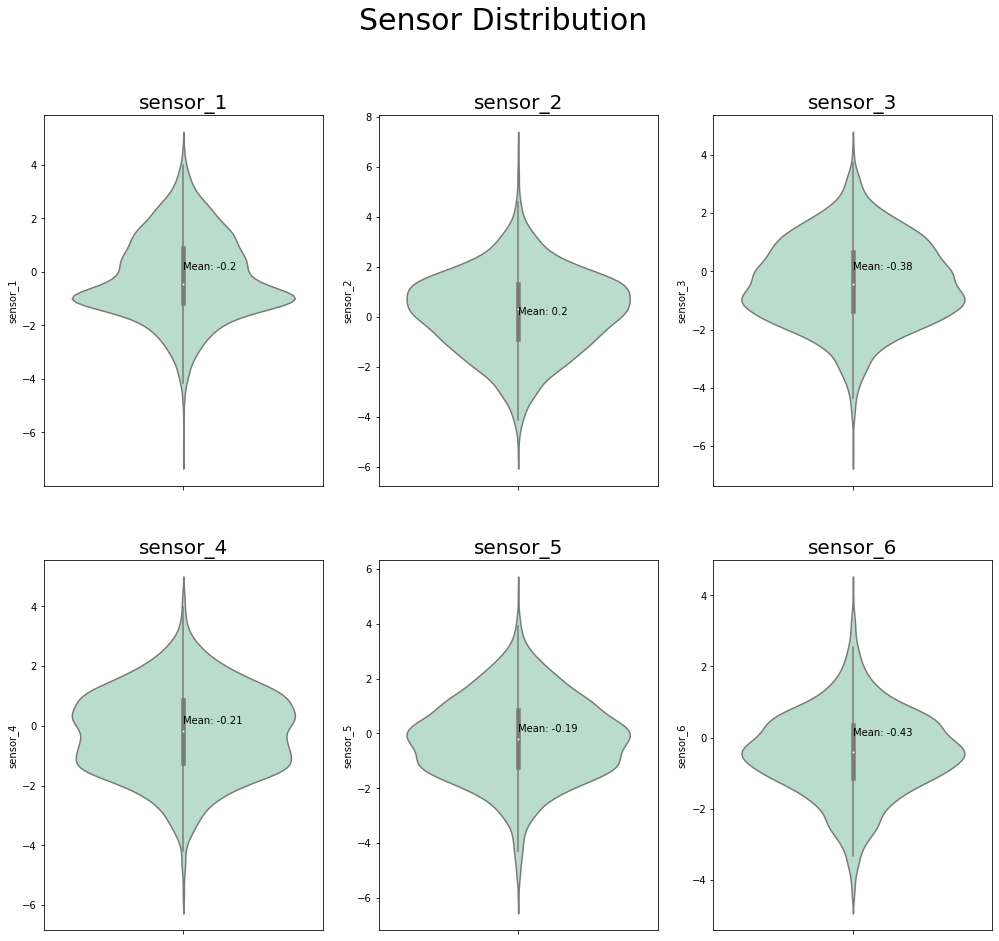

In [7]:
fig, axis=plt.subplots(2,3,figsize=(17,15))
column = 0
row = 0
features = list(train.columns)[:-1]
plt.suptitle('Sensor Distribution',fontsize=30)
for col in features:
    axis[row,column].set_title(col, size=20)
    box = sns.violinplot(y = col, data = train, ax=axis[row, column], palette='Pastel2')
    box.annotate(f"Mean: {train[col].mean().round(2)}", xy=(0,0), verticalalignment='bottom')
    if column == 2:
        column = 0
        row+=1
    else:
        column+=1

--------------------------------------------------------------------
`🚀 Data Hints:`

Predictive featurs seems to have similar scale, but the distributions is quite different between each of them.

For example, sensor 4 has a balanced distribution along its range, while sensor 2 has a bias to lower values.


--------------------------------------------------------------------

<AxesSubplot:title={'center':'Correlation between features'}>

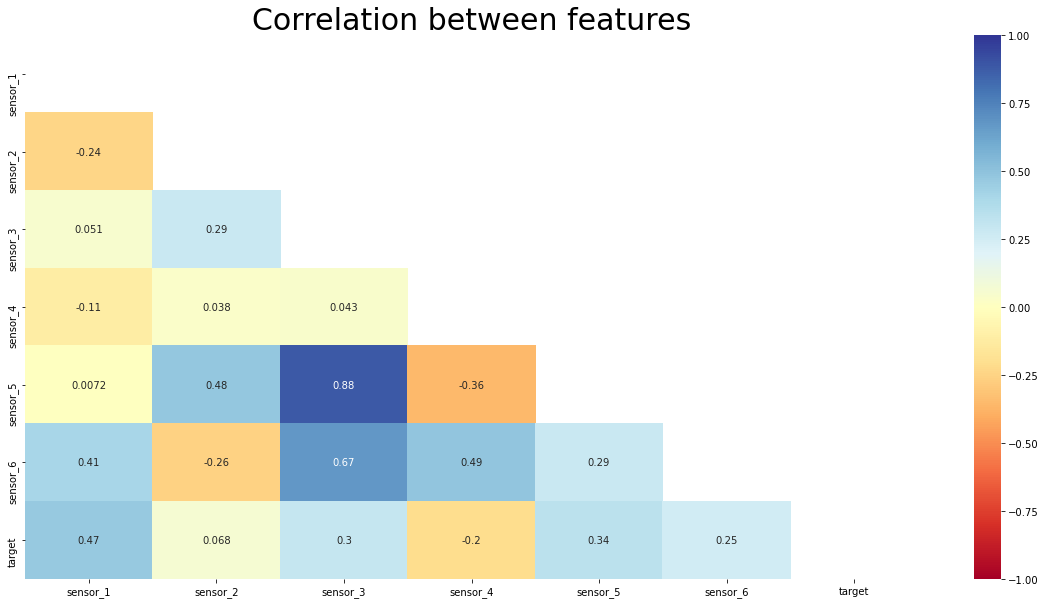

In [8]:
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(train.corr()))
plt.title("Correlation between features", size=30)
sns.heatmap(train.corr(), annot = True, vmin = -1, vmax = 1, cmap='RdYlBu',mask=mask)

--------------------------------------------------------------------
`🚀 Data Hints:`

In the very begining, the idea was to show the correlation between each predective features, since our target is a categorical label.

But thinking a little more, in fact we can stablish some kind of lineal progression between each value of our target, since stable is lower to Light turbulence, and that pattern can be used along all the values.

Because of that, I finally include it in order to also show the correlation between predective features and target.

Some thoughts:

* Significant positive correlation between target and sensor one.
* No correlation between target and sensor 2
* Significant negative correlation between target and sensor 4.
* High positive correlation between sensor 3 and 5, and also they seems to have similar correlation with our feature

--------------------------------------------------------------------

### Features and Target Pairplot

Other way to see what mentioned before, is with a pairplot between all our significant features. (excluding sensor 2)

In some combinations, we can see some insights (for example Extreme turbulence with sensor five and one, seems to be related with high values for both of them).

But for general cases, we can't use just two or three features to fully difference our target.

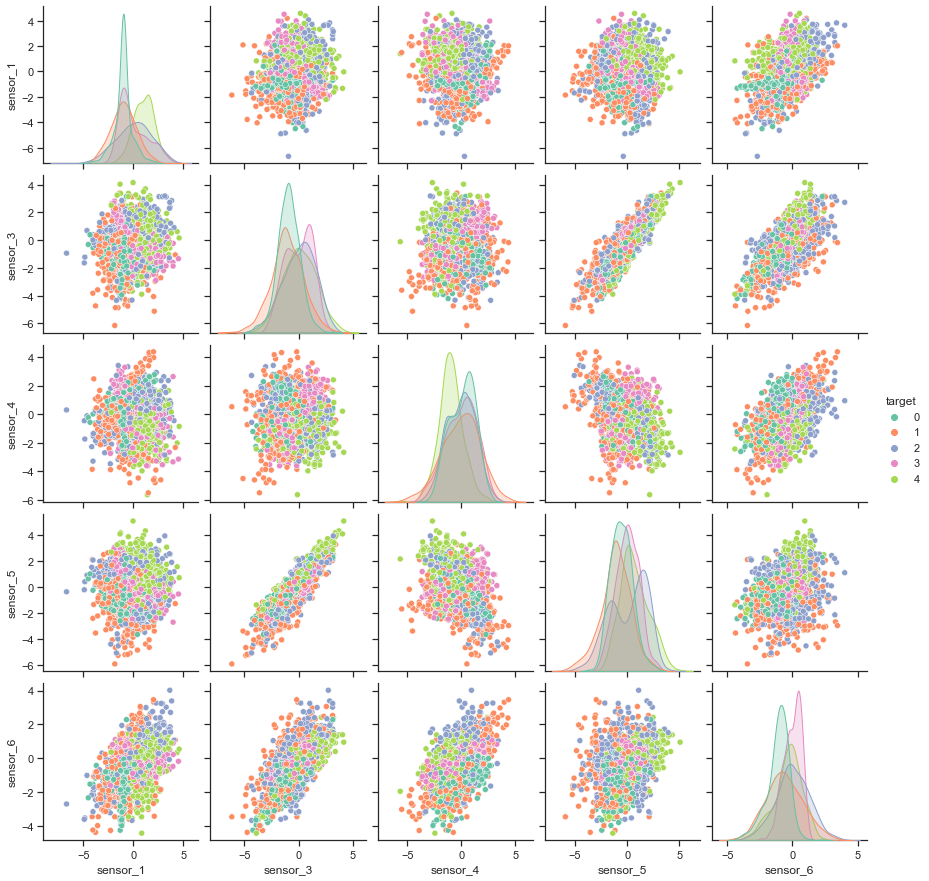

In [9]:

sns.set_theme(style="ticks")
sns.pairplot(train[["sensor_1","sensor_3","sensor_4",
                   "sensor_5","sensor_6","target"]], hue="target",palette = "Set2")

## Data Wrangling

In this section, we are going to prepare our data for training several models.
* Drop sensor_2 columns since does not presents correlation with our target
* Between sensor_3 and sensor_5, we are going to keep just sensor_5 to avoid multicollinearity between predictive variables
* Split in train and test


In [10]:
data_clean = train.drop(labels=['sensor_2','sensor_3'], axis=1)
data_clean.head(2)

,sensor_1,sensor_4,sensor_5,sensor_6,target
Unnamed: 0,,,,,
0,0.474335,-1.251935,-1.035151,-1.934367,4
1,-1.034675,-1.555989,-0.337553,-2.473838,0


In [11]:
# train, test split

X = data_clean.drop(columns=['target'])
y = data_clean.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
y_train.value_counts()

3    350
0    346
1    332
2    331
4    321
Name: target, dtype: int64

--------------------------------------------------------------------
`🚀 Data Hints:`


There is no need to oversample our target, as all categories appear to be equally distributed.

--------------------------------------------------------------------

## Algorithms

### Random Forest Classifier

In [13]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [14]:
# Model report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        81
           1       0.72      0.66      0.69        91
           2       0.73      0.67      0.70        88
           3       0.76      0.79      0.77        76
           4       0.75      0.77      0.76        84

    accuracy                           0.75       420
   macro avg       0.75      0.75      0.75       420
weighted avg       0.75      0.75      0.75       420



### Random Forest Classifier with standard features

In fact, since we don't know much about each feature, there is no technical reason to claim that they are all on the same scale.

Therefore, I would like to see if we can achieve better performance, with standardized functions.

In [15]:
scaler_f=StandardScaler()
X_train_sc = scaler_f.fit_transform(X_train)
X_test_sc = scaler_f.transform(X_test)

rfc_sc = RandomForestClassifier(n_estimators=200)
rfc_sc.fit(X_train_sc, y_train)
pred_rfc_sc = rfc.predict(X_test_sc)


In [16]:
# Model performance
print(classification_report(y_test, pred_rfc_sc))

              precision    recall  f1-score   support

           0       0.62      0.49      0.55        81
           1       0.59      0.29      0.39        91
           2       0.59      0.65      0.62        88
           3       0.50      0.74      0.60        76
           4       0.66      0.82      0.73        84

    accuracy                           0.59       420
   macro avg       0.59      0.60      0.58       420
weighted avg       0.60      0.59      0.57       420



There are not big differences in model results, but as Bruce Lee said : `“Be like water making its way through cracks“`

### Stochastic Gradient Decent Classifier

In [17]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train_sc, y_train)
pred_sgd = sgd.predict(X_test_sc)

In [18]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61        81
           1       0.58      0.88      0.70        91
           2       0.34      0.26      0.29        88
           3       0.62      0.34      0.44        76
           4       0.65      0.73      0.69        84

    accuracy                           0.57       420
   macro avg       0.56      0.56      0.54       420
weighted avg       0.56      0.57      0.55       420



❌ Worst performance ever! 😜

### Support Vector Classifier

An SVM classifier, or support vector machine classifier, is a type of machine learning algorithm that can be used to analyze and classify data. A support vector machine is a supervised machine learning algorithm that can be used for both classification and regression tasks. The Support vector machine classifier works by finding the hyperplane that maximizes the margin between the two classes. The Support vector machine algorithm is also known as a max-margin classifier. 

In [19]:
svc = SVC()
svc.fit(X_train_sc, y_train)
pred_svc = svc.predict(X_test_sc)

In [20]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        81
           1       0.73      0.71      0.72        91
           2       0.74      0.69      0.72        88
           3       0.70      0.82      0.75        76
           4       0.79      0.81      0.80        84

    accuracy                           0.76       420
   macro avg       0.76      0.76      0.76       420
weighted avg       0.76      0.76      0.76       420



With SVC, we found better macro results than with Random Forest. So for now is our chosen.

### Gradient Boost Classifier

In [21]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sc, y_train)
pred_gbc = gbc.predict(X_test_sc)

In [22]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78        81
           1       0.71      0.54      0.61        91
           2       0.68      0.60      0.64        88
           3       0.66      0.78      0.71        76
           4       0.71      0.73      0.72        84

    accuracy                           0.69       420
   macro avg       0.69      0.70      0.69       420
weighted avg       0.69      0.69      0.69       420



Not as good as SVC

### Grid Search CV and SVC

SVC Params

Kernels: The main function of the kernel is to take low dimensional input space and transform it into a higher-dimensional space. It is mostly useful in non-linear separation problem.

C (Regularization): C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term.

Gamma: It defines how far influences the calculation of plausible line of separation. When gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.



In [23]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   23.5s finished


In [24]:
grid_predictions = grid.predict(X_test)

In [25]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82        81
           1       0.75      0.76      0.75        91
           2       0.76      0.68      0.72        88
           3       0.74      0.87      0.80        76
           4       0.81      0.77      0.79        84

    accuracy                           0.78       420
   macro avg       0.78      0.78      0.78       420
weighted avg       0.78      0.78      0.78       420



## Predictions

In [26]:
data_real = pd.read_csv(path_test)
data_real.head(2)

,Unnamed: 0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6
0,0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068


In [27]:
data_real = data_real.set_index("Unnamed: 0")
data_real_clean = data_real.drop(labels=['sensor_2','sensor_3'], axis=1)
data_real_clean.head(2)

,sensor_1,sensor_4,sensor_5,sensor_6
Unnamed: 0,,,,
0,0.943723,3.580261,-3.038106,2.080338
1,-0.899819,0.718186,1.117035,0.463068


In [28]:
X_real_sc = scaler_f.transform(data_real_clean)

In [29]:
predictions = grid.predict(X_real_sc)

In [35]:
data_final = pd.DataFrame(predictions,columns=['final_status'])

In [37]:
data_final.to_csv(path_predictions, index=False)

<img src ="https://pbs.twimg.com/media/E79lrBFWEAY_ZLT.jpg" width=800>